In [49]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

amazon_df = pd.read_csv('amazon_baby.csv')
amazon_df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Some quick data cleaning
Let's look at some of the reviews:

In [50]:
amazon_df['review'][0]

'These flannel wipes are OK, but in my opinion not worth keeping.  I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality.  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.'

In [51]:
amazon_df['review'][30:50]

30    Beautiful little book.  A great little short s...
31    This book is so worth the money. It says 9+ mo...
32    we just got this book for our one-year-old and...
33    The book is colorful and is perfect for 6month...
34    The book is cute, and we are huge fans of Lama...
35    What a great book for babies!  I\'d been looki...
36    My son loved this book as an infant.  It was p...
37    Our baby loves this book & has loved it for a ...
38                                                  NaN
39    My son likes brushing elmo\'s teeth. Almost to...
40    This was a birthday present for my 2 year old ...
41    This bear is absolutely adorable and I would g...
42    My baby absolutely loves Elmo and so this book...
43    I bought two for recent baby showers!  The boo...
44    We wanted to get another book like the Big Bir...
45    This is a cute little peek-a-boo story book.  ...
46    My 3 month old son loves this book. We read it...
47    Very cute interactive book! My son loves t

In [52]:
def cleanNaN(value):
    if pd.isnull(value):
        return ""
    else:
        return value

amazon_df['review'] = amazon_df['review'].apply(cleanNaN)
amazon_df['review'][30:50]

30    Beautiful little book.  A great little short s...
31    This book is so worth the money. It says 9+ mo...
32    we just got this book for our one-year-old and...
33    The book is colorful and is perfect for 6month...
34    The book is cute, and we are huge fans of Lama...
35    What a great book for babies!  I\'d been looki...
36    My son loved this book as an infant.  It was p...
37    Our baby loves this book & has loved it for a ...
38                                                     
39    My son likes brushing elmo\'s teeth. Almost to...
40    This was a birthday present for my 2 year old ...
41    This bear is absolutely adorable and I would g...
42    My baby absolutely loves Elmo and so this book...
43    I bought two for recent baby showers!  The boo...
44    We wanted to get another book like the Big Bir...
45    This is a cute little peek-a-boo story book.  ...
46    My 3 month old son loves this book. We read it...
47    Very cute interactive book! My son loves t

## Build the word count vector for each review

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
features = vect.fit_transform(amazon_df['review'])

features.shape

(183531, 68032)

In [54]:
vect.get_feature_names()[0:20]

['00',
 '000',
 '0001',
 '000ft',
 '000importer',
 '000sqft',
 '001',
 '001cm',
 '00am',
 '00amcreepy',
 '00cons',
 '00dollars',
 '00etwhile',
 '00not',
 '00pm',
 '01',
 '01262',
 '016sc01',
 '01992',
 '01p']

In [55]:
vect.vocabulary_.get(u'colorful')

14110

## Examining the reviews for most-sold product: 'Vulli Sophie the Giraffe Teether'

In [56]:
giraffe_reviews = amazon_df[amazon_df['name'] == 'Vulli Sophie the Giraffe Teether']

giraffe_reviews.head()

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5


In [57]:
giraffe_reviews.shape

(785, 3)

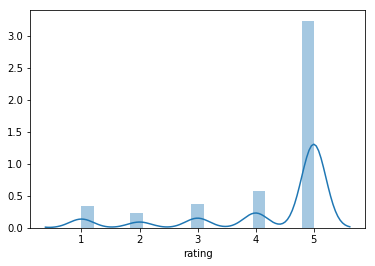

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(giraffe_reviews['rating'])

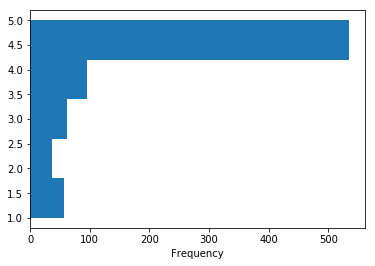

In [59]:
giraffe_reviews['rating'].plot(y='rating', orientation='horizontal', kind='hist', bins=5)

# Build a sentiment classifier

## Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment. Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.


In [60]:
#ignore all 3* reviews
amazon_df = amazon_df[amazon_df['rating'] != 3]


In [61]:
amazon_df['sentiment'] = amazon_df['rating'] >= 4
amazon_df.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


## Let's train the sentiment classifier

In [62]:
amazon_df.sentiment.value_counts()

True     140259
False     26493
Name: sentiment, dtype: int64

In [63]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(amazon_df['review'], amazon_df['sentiment'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(133401,)
(33351,)


In [64]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<133401x57485 sparse matrix of type '<class 'numpy.int64'>'
	with 7080210 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
X_test_dtm = vect.transform(X_test)

# class predictions and predicted probabilities
y_pred_class = log_reg_model.predict(X_test_dtm)
y_pred_prob = log_reg_model.predict_proba(X_test_dtm)[:, 1]

## Evaluate the model

In [67]:
# calculate accuracy and AUC
from sklearn import metrics
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_class))
print("AUC:",metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy score: 0.932445803724
AUC: 0.955189146203


In [68]:
# confusion matrix
print("confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred_class))

confusion matrix
[[ 3862  1412]
 [  841 27236]]


## Applying the learned model to understand sentiment for Giraffe
Let's see if we can predict the review for the 785 giraffe teether. We first need to transform each review into a document term matrix. We can reuse the vectorizer from earlier since the giraffe reviews were included the last time we used it. Otherwise we could end up with words in the giraffe review that did not exist when we vectorized the corpus of words -- not good.

In [69]:
# Vectorize each giraffe review
giraffe_vect_dtm = vect.transform(giraffe_reviews['review'])
giraffe_vect_dtm

<785x57485 sparse matrix of type '<class 'numpy.int64'>'
	with 36623 stored elements in Compressed Sparse Row format>

In [70]:
giraffe_reviews['predicted_sentiment'] = log_reg_model.predict(giraffe_vect_dtm)

In [71]:
giraffe_reviews['predicted_sentiment'] = log_reg_model.predict_proba(giraffe_vect_dtm)[:, 1]

giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,1.0
34341,Vulli Sophie the Giraffe Teether,I\'ll be honest...I bought this toy because al...,4,1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,1.0
34410,Vulli Sophie the Giraffe Teether,Our son really likes Sopie...the problem is th...,5,1.0


In [72]:
giraffe_reviews.tail()

,name,review,rating,predicted_sentiment
34556,Vulli Sophie the Giraffe Teether,"Alright, first off didn\'t realize this was a ...",2,1.510875e-04
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,6.193361e-05
34994,Vulli Sophie the Giraffe Teether,When I received this the paint was peeling off...,1,4.918569e-05
34748,Vulli Sophie the Giraffe Teether,"My daughter loves Sophie, but we received her ...",2,4.608114e-05
34687,Vulli Sophie the Giraffe Teether,I wanted to love this product and was excited ...,1,2.919265e-10
